In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
fraud = pd.read_csv("/content/Fraud_check.csv")
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [3]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [4]:
#renaming the columns 
fraud = fraud.rename(columns={"Marital.Status":"Marital_Status","Taxable.Income":"Taxable_Income","City.Population":"City_Population","Work.Experience":"Work_Experience"})

AS per problem statement traget variable is taxable income if tax<= 30,000 is risky else good.

In [5]:
fraud['income'] = fraud['Taxable_Income'].apply(lambda Taxable_Income:'Risky' if Taxable_Income <= 30000 else 'good')
fraud.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban,income
0,NO,Single,68833,50047,10,YES,good
1,YES,Divorced,33700,134075,18,YES,good
2,NO,Married,36925,160205,30,YES,good
3,YES,Single,50190,193264,15,YES,good
4,NO,Married,81002,27533,28,NO,good


In [6]:
fraud = fraud.drop('Taxable_Income', axis = 1)

In [7]:
fraud.describe().T

,count,mean,std,min,25%,50%,75%,max
City_Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work_Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


<ipython-input-8-909588cae8dd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fraud['City_Population'])


<Axes: xlabel='City_Population', ylabel='Density'>

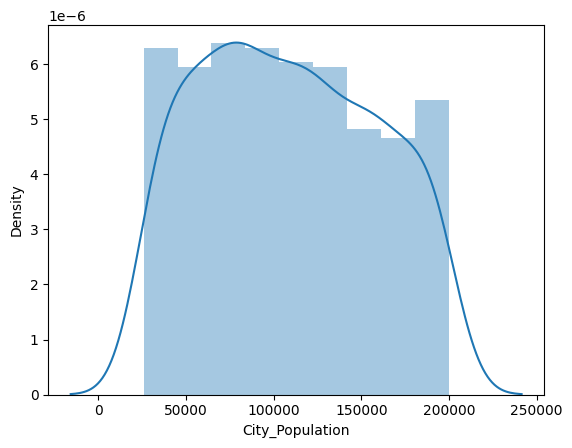

In [8]:
sns.distplot(fraud['City_Population'])

City_Population


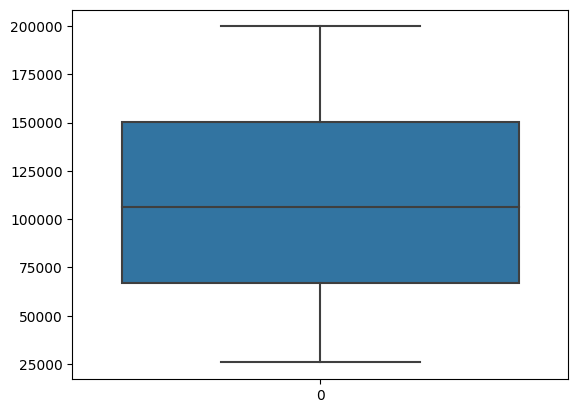

Work_Experience


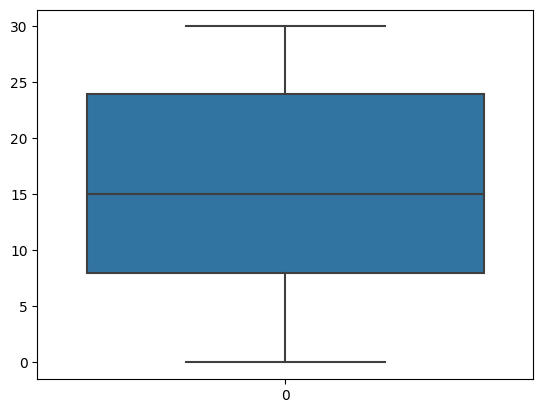

In [9]:
#finding outliers
for feature in fraud.columns:
  if fraud[feature].dtype == 'int64':
    print(feature)
    sns.boxplot(fraud[feature])
    plt.show()

no outliers observed

In [10]:
#label encoding
label = LabelEncoder()
for feature in fraud.columns:
  if fraud[feature].dtype != 'int64':
    fraud[feature] = label.fit_transform(fraud[feature])
fraud.head()

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,income
0,0,2,50047,10,1,1
1,1,0,134075,18,1,1
2,0,1,160205,30,1,1
3,1,2,193264,15,1,1
4,0,1,27533,28,0,1


In [11]:
fraud['income'].value_counts(normalize=True)

1    0.793333
0    0.206667
Name: income, dtype: float64

we can say its a slightly imbalnced data

In [12]:
# dividing independent and dependent variables
X = fraud.iloc[:,:5]
y = fraud.iloc[:,-1]

In [13]:
#splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rf_model = RandomForestClassifier(n_estimators=1000, max_features=4,max_depth=3)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, max_features=4, n_estimators=1000)

In [14]:
print("train Score", rf_model.score(X_train,y_train))
print("test Score", rf_model.score(X_test,y_test))

train Score 0.7935323383084577
test Score 0.7929292929292929


In [15]:
confusion_matrix(y_train,rf_model.predict(X_train))

array([[  0,  83],
       [  0, 319]])

In [16]:
print(classification_report(y_train,rf_model.predict(X_train)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        83
           1       0.79      1.00      0.88       319

    accuracy                           0.79       402
   macro avg       0.40      0.50      0.44       402
weighted avg       0.63      0.79      0.70       402



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#model is very high biased towards class '1'. thats why class '0' prescision, recall and f1 score are zero only which means model is not all predicting class '0'.  

In [17]:
# handling imbalance data using SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 42)
x_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [18]:
y_train_res.value_counts()

0    319
1    319
Name: income, dtype: int64

In [19]:
rf_model2 = RandomForestClassifier(n_estimators=1000, max_features=4,max_depth=3)
rf_model2.fit(x_train_res,y_train_res)


RandomForestClassifier(max_depth=3, max_features=4, n_estimators=1000)

In [20]:
print(accuracy_score(y_train_res,rf_model2.predict(x_train_res)))
print(classification_report(y_train_res,rf_model2.predict(x_train_res)))

0.6990595611285266
              precision    recall  f1-score   support

           0       0.67      0.77      0.72       319
           1       0.73      0.63      0.68       319

    accuracy                           0.70       638
   macro avg       0.70      0.70      0.70       638
weighted avg       0.70      0.70      0.70       638



#after balncing data set our accuracy score is reduced but class '0' precision and recall scores are increased.so, this model is better than previous model.

In [21]:
print(accuracy_score(y_test,rf_model2.predict(X_test)))
print(classification_report(y_test,rf_model2.predict(X_test)))

0.4898989898989899
              precision    recall  f1-score   support

           0       0.20      0.49      0.28        41
           1       0.79      0.49      0.60       157

    accuracy                           0.49       198
   macro avg       0.49      0.49      0.44       198
weighted avg       0.66      0.49      0.54       198



In [32]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier

random_state = 42  # Specify your desired random state value

k_fold = KFold(n_splits=5, random_state=random_state, shuffle=True)

param_grid = {
    'n_estimators': [10, 50, 100],  # Values for num_trees
    'max_features': ['sqrt', 'log2'],  # Values for max_features
    'max_depth': [None, 5, 10],  # Values for max_depth
}

model = RandomForestClassifier(random_state=random_state)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=k_fold)
grid_search.fit(X_train, y_train)  # X: your feature data, y: your target data

best_model = grid_search.best_estimator_
cross_val_scores = cross_val_score(best_model, x_train_res, y_train_res, cv=k_fold)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Cross-Validation Scores: ", cross_val_scores)


Best Hyperparameters:  {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 10}
Cross-Validation Scores:  [0.6328125  0.6953125  0.6484375  0.69291339 0.5984252 ]


In [33]:
#buliding model with best params
k_fold = KFold(n_splits=5, random_state=random_state, shuffle=True)
model_1 = RandomForestClassifier(n_estimators=10, max_features='sqrt', max_depth=5)
model_1.fit(x_train_res,y_train_res)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [34]:
print("train score",model_1.score(x_train_res,y_train_res))
print("test score",model_1.score(X_test,y_test))

train score 0.7570532915360502
test score 0.5303030303030303


In [35]:
print(classification_report(y_test,model_1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.17      0.34      0.23        41
           1       0.77      0.58      0.66       157

    accuracy                           0.53       198
   macro avg       0.47      0.46      0.45       198
weighted avg       0.65      0.53      0.57       198



In [36]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

random_state = 42  # Specify your desired random state value

k_fold = KFold(n_splits=5, random_state=random_state, shuffle=True)

param_grid = {
    'n_estimators': [10, 50, 100],  # Values for num_trees
    'max_features': ['sqrt', 'log2'],  # Values for max_features
    'max_depth': [None, 5, 10],  # Values for max_depth
}

model = RandomForestClassifier(random_state=random_state)

grid_search = GridSearchCV(model, param_grid=param_grid, cv=k_fold, scoring='f1')
grid_search.fit(X_train, y_train)  # X: your feature data, y: your target data

best_model = grid_search.best_estimator_
cross_val_scores = cross_val_score(best_model, x_train_res, y_train_res, cv=k_fold, scoring='f1')

print("Best Hyperparameters: ", grid_search.best_params_)
print("Cross-Validation F1 Scores: ", cross_val_scores)


Best Hyperparameters:  {'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 50}
Cross-Validation F1 Scores:  [0.62903226 0.70866142 0.67826087 0.66086957 0.60344828]


In [37]:
#buliding model with best params
k_fold = KFold(n_splits=5, random_state=random_state, shuffle=True)
model_1 = RandomForestClassifier(n_estimators=50, max_features='sqrt', max_depth=5)
model_1.fit(x_train_res,y_train_res)
print("train score",model_1.score(x_train_res,y_train_res))
print("test score",model_1.score(X_test,y_test))
print(classification_report(y_test,model_1.predict(X_test)))

train score 0.7789968652037618
test score 0.5303030303030303
              precision    recall  f1-score   support

           0       0.17      0.34      0.23        41
           1       0.77      0.58      0.66       157

    accuracy                           0.53       198
   macro avg       0.47      0.46      0.45       198
weighted avg       0.65      0.53      0.57       198



#various ensemble Techniques

#BAGGING

In [38]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True)
bgcl = bgcl.fit(x_train_res, y_train_res)

In [39]:
print(bgcl.score(x_train_res,y_train_res))
print(bgcl.score(X_test,y_test))

0.9937304075235109
0.5555555555555556


#BOOSTING

In [40]:
#applying gradientBoost classifier for the fraud data only.
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.01)
gbcl = gbcl.fit(x_train_res, y_train_res)
print(gbcl.score(x_train_res,y_train_res))
print(gbcl.score(X_test,y_test))

0.6833855799373041
0.4494949494949495


#STACKING

In [41]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=90)),
    ('DT', DecisionTreeClassifier(random_state=90))]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

In [42]:
stacking_clf.fit(x_train_res,y_train_res)

StackingClassifier(estimators=[('rf', RandomForestClassifier(random_state=90)),
                               ('DT', DecisionTreeClassifier(random_state=90))],
                   final_estimator=LogisticRegression())

In [43]:
print("train score", stacking_clf.score(x_train_res,y_train_res))
print("test score", stacking_clf.score(X_test,y_test))

train score 1.0
test score 0.5757575757575758


# By coparing all model metrics we can say model_1 = RandomForestClassifier(n_estimators=50, max_features='sqrt', max_depth=5) is better model.